# Linear & Logistic Regression
We start with importing the required libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Now we can import our dataset from the CSV file into a pandas dataframe 

In [21]:
df = pd.read_csv("./heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Data Analysis
Let's start by taking a look at the first few rows of the dataset

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Now we can look at the the available columns

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

We can run built-in functions to get some more information on the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now that we have an idea of the data and it's shape, we can run dropna() to make sure there are no missing fields (even though info() showed us there are no NA rows)

In [26]:
df = df.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Linear Regression
To build a Linear Regression model, we have to prepare the data by selecting feature and performing a train-test split so that we can validate our model performance

In [27]:
from sklearn.model_selection import train_test_split
X = df[['age']]
y = df['thalach']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_test.shape

(205,)

Now we can import the model and fit it to the data. Then we can use the model to predict the target (thalach) on our test set and store the predictions

In [28]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
y_pred.shape

(205,)

Now let's visualize the model performance by looking at the regression line plotted on top of the test datapoints

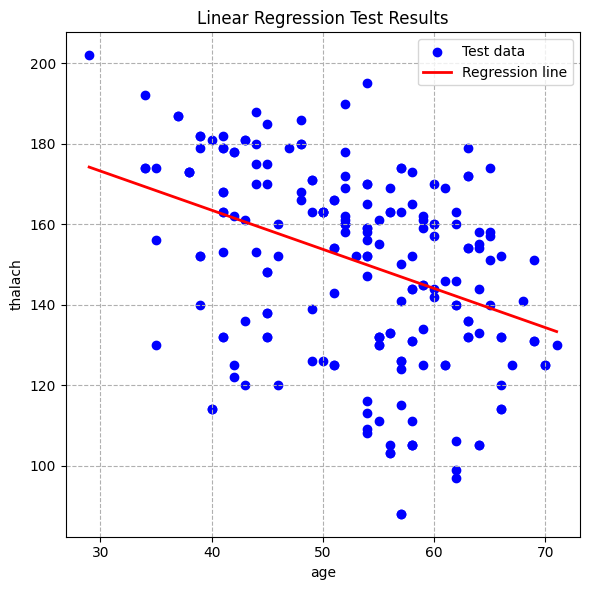

In [29]:
sorted_idx = np.argsort(X_test.values.flatten())
X_sorted = X_test.values.flatten()[sorted_idx]
y_test_sort = y_test.values.flatten()[sorted_idx]
y_pred_sort = y_pred[sorted_idx]

plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_sorted, y_pred_sort, color='red', linewidth=2, label='Regression line')
plt.title("Linear Regression Test Results")
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

We can see that the regression line does fit the data well, even though the data has many outliers

## Logistic Regression
Now we can move onto logistic regression, using the 'age', 'sex', 'cp', 'trestbps', 'chol' columns as features and predicting the 'target' column. We will start with the data preparation.

In [30]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
y_test.shape

(205,)

We can import the LogisticRegression model and train it on the prepared data. Then, we can use the model to predict the target value from the test set and store the predicted values

In [31]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_pred.shape

(205,)

Now we can use F1 score, ROC Curve and ROC AUC Score to check the model's performance

**F1 Score**: It is a single metric that combines precision and recall. Precision is "from all the positive predictions, how many were correct?" and Recall is "from all the actual positive instances, how many did the model identify?" The formula for it is: <br> <br>
$F_1 = 2 \times \dfrac{Precision \times Recall}{Precision + Recall}$

In [32]:
from sklearn.metrics import f1_score, roc_auc_score, RocCurveDisplay
f1_score(y_test, y_pred)

0.7777777777777778

**ROC AUC Score**: It is a single number that summarizes the performance of any binary classifier across all possible classification thresholds. Essentially it is the Area Under the Receiver Operator Curve (ROC Curve discussed below). Since we want to minimize the false positive rate and maximise the true positive rate, we want the curve to be as close to (1, 1) as possible. Hence, the greater the area the curve, the closer the optimal threshold is (1, 1).

In [33]:
y_pred_proba = log_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.8262200956937799

**ROC Curve**: This curve plots true positive rate vs. false positive rate which essentially summarises the confusion matrix we can construct at every classification threshold. It helps us visually identify how accurately the model is classifying the data.

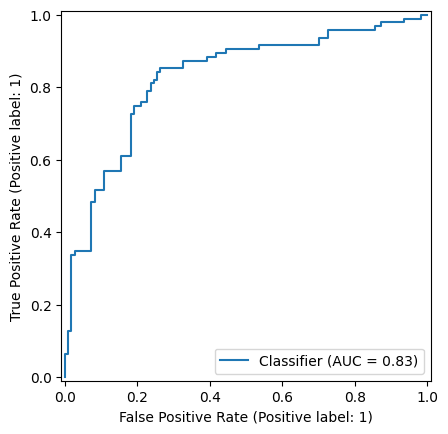

In [34]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

## Improved Logistic Regression
Now let's use all the features available in our dataset and perform logistic regression to see if we can improve the metrics we've attained so far

In [35]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((820, 13), (820,))

This time, we'll use a feature scaler to normalise the range of the features, as well as a Pipeline which allows us to create a sequential flow of data from preprocessing to our model. We can also introduce the SelectFromModel feature selector which allows us to prune features that have lower influence on the classification

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('feature_selection', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', C=0.1))),
        ('classifier', LogisticRegression(solver='newton-cholesky', penalty='l2'))
    ])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"F1 score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

F1 score: 0.8653846153846154
ROC AUC Score: 0.9468773800456969


We can see that both the F1 score and ROC AUC score have improved suggesting that we were missing some key features in the previous attempt

Let's also plot the ROC Curve so that we can see what the optimal threshold is now

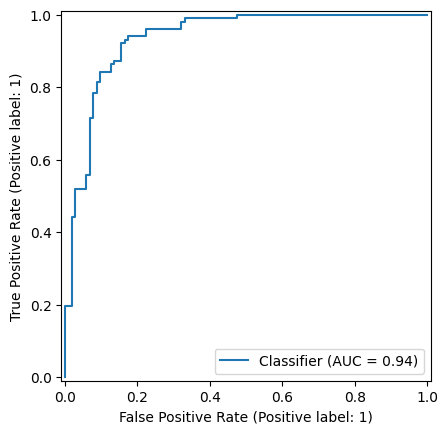

In [19]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

We can see that AUC has gone up to **0.94** suggesting a noticeable improvement in performance

Let's look at which features were kept by the feature selection process

In [37]:
selector = pipe.named_steps['feature_selection']
supp = selector.get_support()
selected_features = X_train.columns[supp]
print(f"Selected Features: {selected_features.to_list()}")

Selected Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


Here we can see that all the features in the training set were kept, which likely means that they had high correlation with the data. Let's verify this visually.

In [45]:
corr_mat = df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


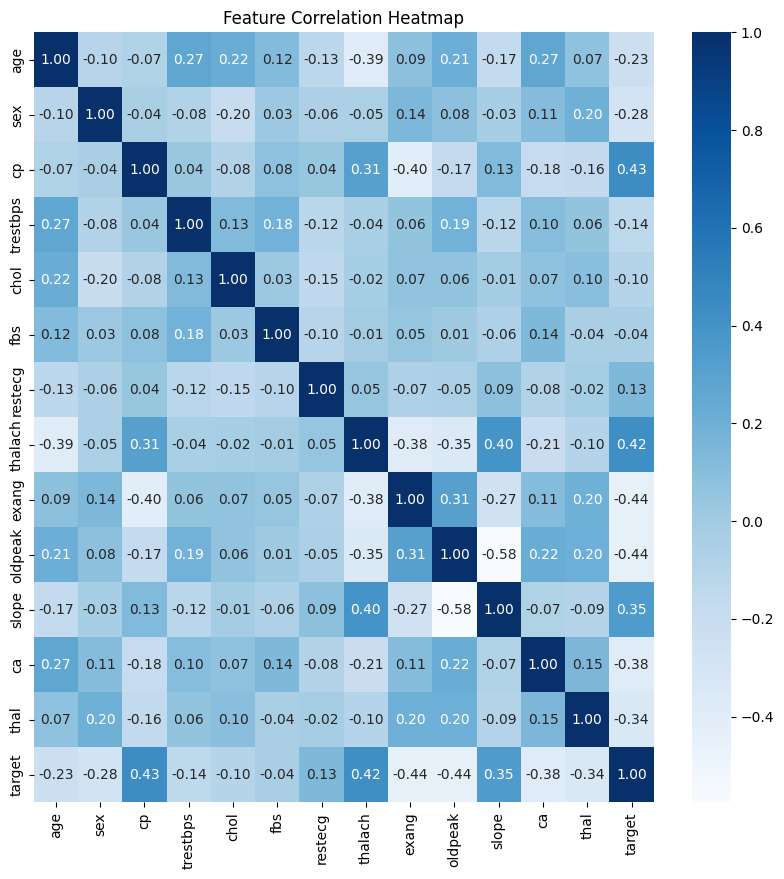

In [47]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

If we look at the target column, we can see that **thalach, slope and cp** have the highest positive relationships while **exang, oldpeak, ca and thal** have negative relationships. The lowest correlated features are **chol, trestpos and fbs**. This suggests that the lower correlated features might not affect the target prediction very much

## Conclusion
1. Age proved to be an essential feature in predicting 'thalach' (Maximum Heart Rate)
2. With a limited set of features ('age', 'sex', 'cp', 'trestbps', 'chol') a Logistic Regression model was able to achieve:
    - **F1 Score:** 0.778
    - **ROC AUC Score:** 0.826
3. Using all the features with a StandardScaler and feature selector (SelectFromModel), we got a Logistic Regression model to achieve:
    - **F1 Score:** 0.865
    - **ROC AUC Score:** 0.946